# Keras로 Linear&Logistic Regression 조금 더 맛보기

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

# Linear Regression on 쬐금 더 어려운 데이터

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
x = boston.data
y = boston.target

x.shape, y.shape

((506, 13), (506,))

In [ ]:
# 모델링: Sequential API

# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()

# 3. 레이어 조립
model.add(keras.layers.Input(shape=(13,)))
model.add(keras.layers.Dense(1))

# Original Sequential API
# model.add(keras.layers.Dense(1, input_shape=(13,)))

# 4. 컴파일
model.compile(loss = 'mse', optimizer = 'adam')
# model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


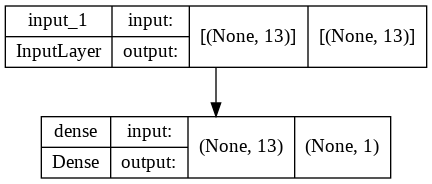

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
hist = model.fit(x, y, epochs=20, verbose=1)

Epoch 1/20
16/16 [==============================] - 0s 2ms/step - loss: 43515.1758
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 37676.5742
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 32330.7930
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 27680.0176
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 23480.5098
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 19857.8184
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 16656.8223
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 13932.2773
Epoch 9/20
16/16 [==============================] - 0s 2ms/step - loss: 11571.2822
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 9558.9678
Epoch 11/20
16/16 [==============================] - 0s 2ms/step - loss: 7854.0391
Epoch 12/20
16/16 [==============================] - 0s 2ms/step - loss: 6452.1475
Epoc

In [ ]:
y_pred = model.predict(x)
y_pred[:10].reshape(-1)

array([15.540306, 27.70649 , 25.403137, 28.873901, 29.896137, 29.884947,
       15.803351, 18.243685, 18.13101 , 15.946961], dtype=float32)

In [ ]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
model.get_weights()

[array([[ 0.6248556 ],
        [-0.08032687],
        [-0.05235374],
        [-0.23682882],
        [ 0.20933856],
        [-0.27134818],
        [ 0.05548428],
        [-0.08869493],
        [ 0.4802529 ],
        [-0.1641201 ],
        [ 0.20055677],
        [ 0.15083477],
        [ 0.09677284]], dtype=float32), array([0.20238107], dtype=float32)]

# Logistic Regression 쬐금 더 어려운 데이터

In [67]:
from sklearn.datasets import load_breast_cancer

In [68]:
cancer = load_breast_cancer()

In [69]:
x = cancer.data
y = cancer.target

# 모양 확인
x.shape, y.shape

((569, 30), (569,))

In [83]:
# 모델링: Sequential API

# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 선언
model = keras.models.Sequential()

# 3. 레이어 조립
model.add(keras.layers.Input(shape=(30,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 4. 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


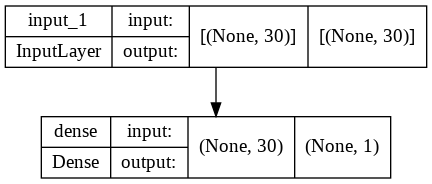

In [84]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [85]:
model.fit(x, y, epochs=10, verbose=1)

Epoch 1/10
18/18 [==============================] - 0s 2ms/step - loss: 105.7946 - accuracy: 0.6274
Epoch 2/10
18/18 [==============================] - 0s 1ms/step - loss: 87.3092 - accuracy: 0.6274
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 69.6855 - accuracy: 0.6274
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 51.3174 - accuracy: 0.6257
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 32.8597 - accuracy: 0.6063
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 17.4704 - accuracy: 0.3603
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 12.3610 - accuracy: 0.1757
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 11.6446 - accuracy: 0.1775
Epoch 9/10
18/18 [==============================] - 0s 2ms/step - loss: 10.8941 - accuracy: 0.1863
Epoch 10/10
18/18 [==============================] - 0s 2ms/step - loss: 10.1508 - accuracy: 0.1898


In [86]:
y_pred = model.predict(x)

In [87]:
for idx, val in enumerate(y_pred):
  if val >= 0.5:
    y_pred[idx] = 1
  else:
    y_pred[idx] = 0
y_pred[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [88]:
y[:5]

array([0, 0, 0, 0, 0])